In [8]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from tensorflow import keras



<ipython-input-8-4b266d6645a6>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [9]:
# model = keras.models.load_model('ADANIPORTS_trained_model.h5')

In [10]:
def get_stock_data(normalized=0):
    # url = 'http://chart.finance.yahoo.com/table.csv?s=%s&a=11&b=15&c=2011&d=29&e=10&f=2016&g=d&ignore=.csv' % stock_name

    # col_names = ['Date','Open','High','Low','Close','Volume','Adj Close']
    stocks = pd.read_csv('Adani_new.csv') 
    df = pd.DataFrame(stocks)
    date_split = df['Date'].str.split('-').str
    df['Year'], df['Month'], df['Day'] = date_split
    df["Volume"] = df["Volume"] / 10000
    #df.drop(df.columns[[0,3,5,6, 7,8,9]], axis=1, inplace=True) 
    return df

In [11]:
df = get_stock_data(0)
df.head()

<ipython-input-10-2fb6a2fcb72c>:8: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Year'], df['Month'], df['Day'] = date_split


,Unnamed: 0,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,...,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,score1,score2,Year,Month,Day
0,0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,...,2729.4366,2.687719e+15,NaN,9859619,0.3612,positive,positive,2007,11,27
1,1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,...,458.1338,4.312765e+14,NaN,1453278,0.3172,negative,neutral,2007,11,28
2,2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,...,512.4121,4.550658e+14,NaN,1069678,0.2088,neutral,neutral,2007,11,29
3,3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,...,460.9762,4.283257e+14,NaN,1260913,0.2735,neutral,neutral,2007,11,30
4,4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,...,297.7470,2.875200e+14,NaN,816123,0.2741,neutral,neutral,2007,12,03


In [12]:
#df.drop(df.columns[[0,1,2,3,6, 7,9,10,11,12,13,14,15,16,17]], axis=1, inplace=True)
df1=df[[ 'High','Low','Turnover','score1','VWAP']]
df1.head()

,High,Low,Turnover,score1,VWAP
0,1050.00,770.0,2.687719e+15,positive,984.72
1,990.00,874.0,4.312765e+14,negative,941.38
2,914.75,841.0,4.550658e+14,neutral,888.09
3,958.00,890.0,4.283257e+14,neutral,929.17
4,995.00,922.0,2.875200e+14,neutral,965.65


In [13]:
today = datetime.date.today()
filename = stock_name+'_stock_%s.csv' % today
df.to_csv()

NameError: name 'stock_name' is not defined

In [14]:
df2=df1
df2['Turnover']=df2['Turnover']/1000000000000
df2.head()





<ipython-input-14-0c907684d330>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Turnover']=df2['Turnover']/1000000000000


,High,Low,Turnover,score1,VWAP
0,1050.00,770.0,2687.719054,positive,984.72
1,990.00,874.0,431.276530,negative,941.38
2,914.75,841.0,455.065846,neutral,888.09
3,958.00,890.0,428.325663,neutral,929.17
4,995.00,922.0,287.519974,neutral,965.65


In [15]:
index = df2[df2["score1"] == 'positive'].index
index1 = df2[df2["score1"] == 'neutral'].index
index2 = df2[df2["score1"] == 'negative'].index

In [16]:
df2.loc[index,"score1"] = 100
df2.loc[index1,"score1"] = 10
df2.loc[index2,"score1"] = -100

/Users/krishnachaitanyareddy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [17]:
df2



,High,Low,Turnover,score1,VWAP
0,1050.00,770.00,2687.719054,100,984.72
1,990.00,874.00,431.276530,-100,941.38
2,914.75,841.00,455.065846,10,888.09
3,958.00,890.00,428.325663,10,929.17
4,995.00,922.00,287.519974,10,965.65
...,...,...,...,...,...
3083,320.90,297.35,327.915879,-100,311.11
3084,324.80,311.55,223.005674,10,319.24
3085,322.15,315.40,146.444826,-100,318.18
3086,315.00,306.55,106.323239,10,310.11


In [18]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data =  pd.DataFrame(stock) #stock.as_matrix()
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]
#     print(amount_of_features)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]
def load_data2(stock, seq_len):
    amount_of_features = len(stock.columns)
    data =  pd.DataFrame(stock) #stock.as_matrix()
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    # x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    # x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [19]:
#Build the model
def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=layers[2]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

def build_model2(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16,activation='relu'))        
        model.add(Dense(1,activation='linear'))
        model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
        return model
        

In [20]:
window = 22
data_c = df2.apply(pd.to_numeric, errors='coerce')
X_train, y_train, X_test, y_test = load_data(data_c[::1], window)
y_train

array([1277.64, 1285.72, 1302.15, ...,  347.76,  350.52,  348.91])

In [21]:
print(X_train.shape)
model = build_model2([5,window,1])

(2758, 22, 5)


In [22]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=500,
    validation_split=0.1,
    verbose=1)

Epoch 1/500
5/5 [==============================] - 4s 309ms/step - loss: 143262.6120 - accuracy: 0.0000e+00 - val_loss: 139744.9375 - val_accuracy: 0.0000e+00
Epoch 2/500
5/5 [==============================] - 1s 173ms/step - loss: 141234.7708 - accuracy: 0.0000e+00 - val_loss: 138131.6719 - val_accuracy: 0.0000e+00
Epoch 3/500
5/5 [==============================] - 1s 174ms/step - loss: 141326.8125 - accuracy: 0.0000e+00 - val_loss: 136445.9375 - val_accuracy: 0.0000e+00
Epoch 4/500
5/5 [==============================] - 1s 174ms/step - loss: 140290.2318 - accuracy: 0.0000e+00 - val_loss: 134706.6875 - val_accuracy: 0.0000e+00
Epoch 5/500
5/5 [==============================] - 1s 174ms/step - loss: 138656.3828 - accuracy: 0.0000e+00 - val_loss: 132984.9844 - val_accuracy: 0.0000e+00
Epoch 6/500
5/5 [==============================] - 1s 172ms/step - loss: 134108.4102 - accuracy: 0.0000e+00 - val_loss: 131202.1406 - val_accuracy: 0.0000e+00
Epoch 7/500
5/5 [=============================

5/5 [==============================] - 1s 170ms/step - loss: 66761.4954 - accuracy: 0.0000e+00 - val_loss: 48211.0352 - val_accuracy: 0.0000e+00
Epoch 53/500
5/5 [==============================] - 1s 166ms/step - loss: 69984.7799 - accuracy: 0.0000e+00 - val_loss: 46553.4570 - val_accuracy: 0.0000e+00
Epoch 54/500
5/5 [==============================] - 1s 166ms/step - loss: 67034.3229 - accuracy: 0.0000e+00 - val_loss: 44934.0430 - val_accuracy: 0.0000e+00
Epoch 55/500
5/5 [==============================] - 1s 166ms/step - loss: 64092.0807 - accuracy: 0.0000e+00 - val_loss: 43354.1211 - val_accuracy: 0.0000e+00
Epoch 56/500
5/5 [==============================] - 1s 173ms/step - loss: 64835.3887 - accuracy: 0.0000e+00 - val_loss: 41802.1484 - val_accuracy: 0.0000e+00
Epoch 57/500
5/5 [==============================] - 1s 170ms/step - loss: 64365.0586 - accuracy: 0.0000e+00 - val_loss: 40279.5273 - val_accuracy: 0.0000e+00
Epoch 58/500
5/5 [==============================] - 1s 167ms/step

Epoch 104/500
5/5 [==============================] - 1s 189ms/step - loss: 29897.7728 - accuracy: 0.0000e+00 - val_loss: 3983.1060 - val_accuracy: 0.0000e+00
Epoch 105/500
5/5 [==============================] - 1s 281ms/step - loss: 28163.4564 - accuracy: 0.0000e+00 - val_loss: 3490.8445 - val_accuracy: 0.0000e+00
Epoch 106/500
5/5 [==============================] - 1s 206ms/step - loss: 28089.5345 - accuracy: 0.0000e+00 - val_loss: 3064.1052 - val_accuracy: 0.0000e+00
Epoch 107/500
5/5 [==============================] - 1s 223ms/step - loss: 27089.5716 - accuracy: 0.0000e+00 - val_loss: 2670.9507 - val_accuracy: 0.0000e+00
Epoch 108/500
5/5 [==============================] - 1s 275ms/step - loss: 26334.0602 - accuracy: 0.0000e+00 - val_loss: 2393.3357 - val_accuracy: 0.0000e+00
Epoch 109/500
5/5 [==============================] - 1s 268ms/step - loss: 27994.3203 - accuracy: 0.0000e+00 - val_loss: 2038.8011 - val_accuracy: 0.0000e+00
Epoch 110/500
5/5 [==============================] -

5/5 [==============================] - 1s 176ms/step - loss: 9335.1421 - accuracy: 0.0000e+00 - val_loss: 193.3963 - val_accuracy: 0.0000e+00
Epoch 157/500
5/5 [==============================] - 1s 173ms/step - loss: 9013.5264 - accuracy: 0.0000e+00 - val_loss: 284.5222 - val_accuracy: 0.0000e+00
Epoch 158/500
5/5 [==============================] - 1s 168ms/step - loss: 9341.7863 - accuracy: 0.0000e+00 - val_loss: 140.8642 - val_accuracy: 0.0000e+00
Epoch 159/500
5/5 [==============================] - 1s 170ms/step - loss: 7367.4215 - accuracy: 0.0000e+00 - val_loss: 149.4829 - val_accuracy: 0.0000e+00
Epoch 160/500
5/5 [==============================] - 1s 170ms/step - loss: 8721.2474 - accuracy: 0.0000e+00 - val_loss: 150.8281 - val_accuracy: 0.0000e+00
Epoch 161/500
5/5 [==============================] - 1s 172ms/step - loss: 8736.9824 - accuracy: 0.0000e+00 - val_loss: 150.9279 - val_accuracy: 0.0000e+00
Epoch 162/500
5/5 [==============================] - 1s 173ms/step - loss: 840

5/5 [==============================] - 1s 173ms/step - loss: 4065.6740 - accuracy: 0.0000e+00 - val_loss: 134.0448 - val_accuracy: 0.0000e+00
Epoch 209/500
5/5 [==============================] - 1s 177ms/step - loss: 3883.5852 - accuracy: 0.0000e+00 - val_loss: 154.8407 - val_accuracy: 0.0000e+00
Epoch 210/500
5/5 [==============================] - 1s 173ms/step - loss: 3841.5379 - accuracy: 0.0000e+00 - val_loss: 175.2849 - val_accuracy: 0.0000e+00
Epoch 211/500
5/5 [==============================] - 1s 170ms/step - loss: 4047.0155 - accuracy: 0.0000e+00 - val_loss: 148.9140 - val_accuracy: 0.0000e+00
Epoch 212/500
5/5 [==============================] - 1s 173ms/step - loss: 4299.7729 - accuracy: 0.0000e+00 - val_loss: 133.6290 - val_accuracy: 0.0000e+00
Epoch 213/500
5/5 [==============================] - 1s 175ms/step - loss: 4009.9443 - accuracy: 0.0000e+00 - val_loss: 125.2442 - val_accuracy: 0.0000e+00
Epoch 214/500
5/5 [==============================] - 1s 175ms/step - loss: 384

5/5 [==============================] - 1s 181ms/step - loss: 2563.4495 - accuracy: 0.0000e+00 - val_loss: 238.2561 - val_accuracy: 0.0000e+00
Epoch 261/500
5/5 [==============================] - 1s 179ms/step - loss: 3233.6547 - accuracy: 0.0000e+00 - val_loss: 129.4362 - val_accuracy: 0.0000e+00
Epoch 262/500
5/5 [==============================] - 1s 177ms/step - loss: 2530.7940 - accuracy: 0.0000e+00 - val_loss: 140.6855 - val_accuracy: 0.0000e+00
Epoch 263/500
5/5 [==============================] - 1s 175ms/step - loss: 2397.0366 - accuracy: 0.0000e+00 - val_loss: 350.6974 - val_accuracy: 0.0000e+00
Epoch 264/500
5/5 [==============================] - 1s 171ms/step - loss: 2637.2894 - accuracy: 0.0000e+00 - val_loss: 243.3161 - val_accuracy: 0.0000e+00
Epoch 265/500
5/5 [==============================] - 1s 171ms/step - loss: 2638.8213 - accuracy: 0.0000e+00 - val_loss: 115.5902 - val_accuracy: 0.0000e+00
Epoch 266/500
5/5 [==============================] - 1s 174ms/step - loss: 273

5/5 [==============================] - 1s 182ms/step - loss: 2752.5799 - accuracy: 0.0000e+00 - val_loss: 631.7621 - val_accuracy: 0.0000e+00
Epoch 313/500
5/5 [==============================] - 1s 175ms/step - loss: 2140.0894 - accuracy: 0.0000e+00 - val_loss: 137.4325 - val_accuracy: 0.0000e+00
Epoch 314/500
5/5 [==============================] - 1s 176ms/step - loss: 2247.4676 - accuracy: 0.0000e+00 - val_loss: 284.8864 - val_accuracy: 0.0000e+00
Epoch 315/500
5/5 [==============================] - 1s 181ms/step - loss: 2381.2422 - accuracy: 0.0000e+00 - val_loss: 884.1299 - val_accuracy: 0.0000e+00
Epoch 316/500
5/5 [==============================] - 1s 181ms/step - loss: 1982.4209 - accuracy: 0.0000e+00 - val_loss: 140.3945 - val_accuracy: 0.0000e+00
Epoch 317/500
5/5 [==============================] - 1s 181ms/step - loss: 1729.1049 - accuracy: 0.0000e+00 - val_loss: 383.7232 - val_accuracy: 0.0000e+00
Epoch 318/500
5/5 [==============================] - 1s 177ms/step - loss: 243

5/5 [==============================] - 1s 183ms/step - loss: 1881.5956 - accuracy: 0.0000e+00 - val_loss: 143.2926 - val_accuracy: 0.0000e+00
Epoch 365/500
5/5 [==============================] - 1s 183ms/step - loss: 2143.5503 - accuracy: 0.0000e+00 - val_loss: 290.7597 - val_accuracy: 0.0000e+00
Epoch 366/500
5/5 [==============================] - 1s 180ms/step - loss: 2082.8892 - accuracy: 0.0000e+00 - val_loss: 1086.4969 - val_accuracy: 0.0000e+00
Epoch 367/500
5/5 [==============================] - 1s 179ms/step - loss: 2515.0949 - accuracy: 0.0000e+00 - val_loss: 508.3560 - val_accuracy: 0.0000e+00
Epoch 368/500
5/5 [==============================] - 1s 178ms/step - loss: 1806.8032 - accuracy: 0.0000e+00 - val_loss: 123.4496 - val_accuracy: 0.0000e+00
Epoch 369/500
5/5 [==============================] - 1s 182ms/step - loss: 1964.8696 - accuracy: 0.0000e+00 - val_loss: 190.3613 - val_accuracy: 0.0000e+00
Epoch 370/500
5/5 [==============================] - 1s 181ms/step - loss: 19

5/5 [==============================] - 1s 181ms/step - loss: 2056.9036 - accuracy: 0.0000e+00 - val_loss: 195.6531 - val_accuracy: 0.0000e+00
Epoch 417/500
5/5 [==============================] - 1s 178ms/step - loss: 1820.1951 - accuracy: 0.0000e+00 - val_loss: 133.8203 - val_accuracy: 0.0000e+00
Epoch 418/500
5/5 [==============================] - 1s 178ms/step - loss: 1590.3862 - accuracy: 0.0000e+00 - val_loss: 409.1646 - val_accuracy: 0.0000e+00
Epoch 419/500
5/5 [==============================] - 1s 178ms/step - loss: 1793.7045 - accuracy: 0.0000e+00 - val_loss: 171.3729 - val_accuracy: 0.0000e+00
Epoch 420/500
5/5 [==============================] - 1s 180ms/step - loss: 1645.1185 - accuracy: 0.0000e+00 - val_loss: 517.8297 - val_accuracy: 0.0000e+00
Epoch 421/500
5/5 [==============================] - 1s 180ms/step - loss: 1777.4192 - accuracy: 0.0000e+00 - val_loss: 454.5858 - val_accuracy: 0.0000e+00
Epoch 422/500
5/5 [==============================] - 1s 183ms/step - loss: 180

5/5 [==============================] - 1s 187ms/step - loss: 1488.8850 - accuracy: 0.0000e+00 - val_loss: 146.4471 - val_accuracy: 0.0000e+00
Epoch 469/500
5/5 [==============================] - 1s 181ms/step - loss: 1462.0374 - accuracy: 0.0000e+00 - val_loss: 134.0105 - val_accuracy: 0.0000e+00
Epoch 470/500
5/5 [==============================] - 1s 182ms/step - loss: 1456.0007 - accuracy: 0.0000e+00 - val_loss: 406.6510 - val_accuracy: 0.0000e+00
Epoch 471/500
5/5 [==============================] - 1s 182ms/step - loss: 1511.8456 - accuracy: 0.0000e+00 - val_loss: 389.3978 - val_accuracy: 0.0000e+00
Epoch 472/500
5/5 [==============================] - 1s 188ms/step - loss: 1586.7597 - accuracy: 0.0000e+00 - val_loss: 132.5564 - val_accuracy: 0.0000e+00
Epoch 473/500
5/5 [==============================] - 1s 189ms/step - loss: 1485.1307 - accuracy: 0.0000e+00 - val_loss: 119.0332 - val_accuracy: 0.0000e+00
Epoch 474/500
5/5 [==============================] - 1s 191ms/step - loss: 139

In [23]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))


Train Score: 778.67 MSE (27.90 RMSE)
Test Score: 132.20 MSE (11.50 RMSE)


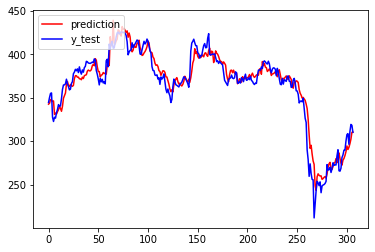

In [24]:
import matplotlib.pyplot as plt2
p=model.predict(X_test)
plt2.plot(p,color='red', label='prediction')
plt2.plot(y_test,color='blue', label='y_test')
plt2.legend(loc='upper left')
plt2.show()

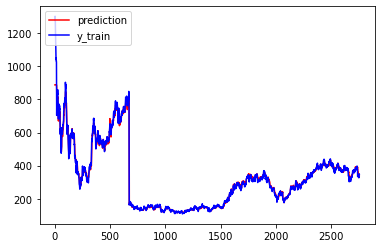

In [25]:
import matplotlib.pyplot as plt2
p=model.predict(X_train)
plt2.plot(p,color='red', label='prediction')
plt2.plot(y_train,color='blue', label='y_train')
plt2.legend(loc='upper left')
plt2.show()


In [59]:
model.save('ADANI_stock_personal.h5')